<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/Rnn(%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.6537
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0281
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.9813e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7529e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5935e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6664e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.5144e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.4268e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7224e-04
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.5708e-04
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3164e-04
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8989e-04
Epoch 15/100
22/22 ━━━

IndexError: index 815 is out of bounds for axis 0 with size 756

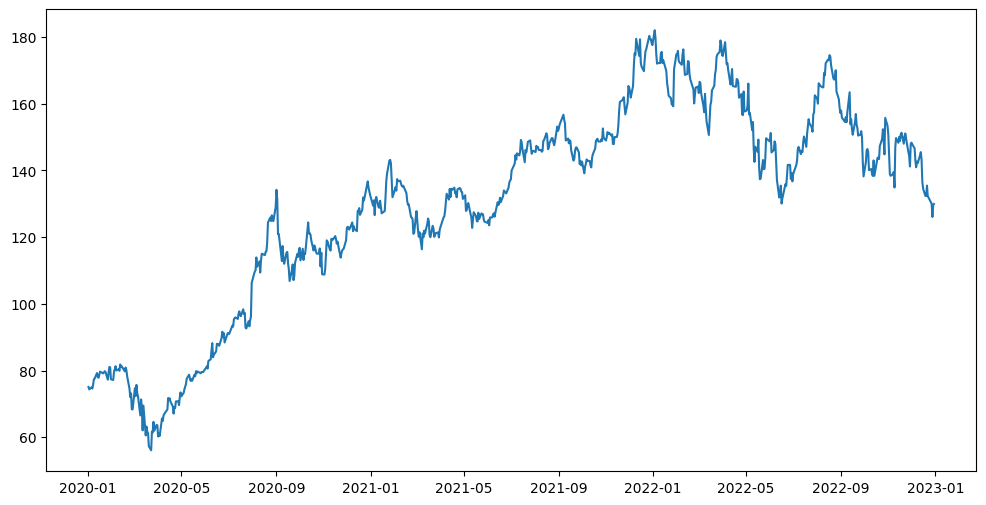

In [1]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 주가 데이터 다운로드 (예: 애플)
ticker = 'AAPL'  # 분석할 주식의 티커
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data = data[['Close']]  # 종가만 사용

# 데이터 전처리
data['Normalized'] = data['Close'] / data['Close'].max()  # 정규화
sequence_length = 60  # 입력 시퀀스 길이

X, y = [], []
for i in range(sequence_length, len(data)):
    X.append(data['Normalized'].values[i-sequence_length:i])
    y.append(data['Normalized'].values[i])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # RNN 입력 형태로 변환

# RNN 모델 생성
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(layers.Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(X, y, epochs=100, verbose=1)

# 예측을 위한 테스트 데이터 준비
test_data = data['Normalized'].values[-sequence_length:]
test_input = test_data.reshape((1, sequence_length, 1))

# 예측
predicted = model.predict(test_input)
predicted_price = predicted[0][0] * data['Close'].max()  # 원래 스케일로 변환

# 실제 주가와 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Price')
plt.axvline(x=data.index[sequence_length + len(data) - 1], color='red', linestyle='--', label='Prediction Start')
plt.scatter(data.index[-1] + pd.Timedelta(days=1), predicted_price, color='red', label='Predicted Price', s=100)
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()